In [4]:
import os
import ipywidgets as widgets
from IPython.display import display, clear_output

# Variable global para las rutas
rutas_archivos = {}

def preparar_uploader(dest_dir, nombres_base):
    """
    Genera widgets de carga de archivos individuales que detectan automáticamente 
    la extensión del archivo subido y lo guardan con el nombre base especificado.
    
    Args:
        dest_dir (str): Ruta del directorio destino donde se guardarán los archivos.
            Si no existe, se creará automáticamente.
        nombres_base (list): Lista de strings con los nombres base para cada archivo
            (sin extensión). Cada elemento generará un widget de carga independiente.
    
    Returns:
        None: La función no retorna valores. Los resultados se almacenan en la 
            variable global 'rutas_archivos'.
    
    Raises:
        OSError: Cuando no se pueden crear los directorios o escribir archivos.
        PermissionError: Cuando no hay permisos suficientes en el directorio destino.
        IOError: Cuando ocurre un error durante la escritura del archivo.
    
    Notes:
        - La variable global 'rutas_archivos' se limpia al inicio de cada ejecución.
        - Si ya existe un archivo con el mismo nombre en el destino, se sobrescribe.
        - La extensión se detecta automáticamente del archivo original subido.
        - Cada upload es independiente y se puede realizar en cualquier orden.
    
    Examples:
        >>> preparar_uploader("/datos/procesamiento/", ["master", "configuracion"])
        # Crea 2 widgets de carga
        # Si subes archivo.csv al primer widget: rutas_archivos['master'] = '/datos/procesamiento/master.csv'
        # Si subes config.xlsx al segundo: rutas_archivos['configuracion'] = '/datos/procesamiento/configuracion.xlsx'
        
        >>> # Verificar rutas después de cargar
        >>> print(rutas_archivos)
        {'master': '/datos/procesamiento/master.csv', 'configuracion': '/datos/procesamiento/configuracion.xlsx'}
    """
    global rutas_archivos
    
    if not nombres_base:
        print("⚠️ Lista vacía")
        return

    os.makedirs(dest_dir, exist_ok=True)
    rutas_archivos.clear()
    elementos = []

    for idx, nombre_base in enumerate(nombres_base):
        label = widgets.Label(f"🗂️ {idx+1}. Cargar '{nombre_base}'")
        uploader = widgets.FileUpload(accept='*', multiple=False)
        output = widgets.Output()

        def on_upload(change, nombre_base=nombre_base, output=output):
            with output:
                clear_output()
                print(f"🔍 Callback ejecutado para {nombre_base}")
                try:
                    # Usar directamente el change en lugar de uploader.value
                    archivos = change['new']
                    # print(f"🔍 Archivos desde change: {type(archivos)}")
                    # print(f"🔍 Contenido change: {archivos}")
                    
                    if not archivos:
                        print("❌ No hay archivos en change")
                        return
                    
                    # Probar diferentes formas de acceder a los datos
                    if isinstance(archivos, dict):
                        # print("🔍 Es diccionario, obteniendo primer valor")
                        fileinfo = list(archivos.values())[0]
                    elif isinstance(archivos, (list, tuple)) and len(archivos) > 0:
                        # print("🔍 Es lista/tupla, obteniendo primer elemento")
                        fileinfo = archivos[0]
                    else:
                        print(f"❌ Tipo de archivo no reconocido: {type(archivos)}")
                        return
                        
                    # print(f"🔍 FileInfo: {type(fileinfo)}")
                    # print(f"🔍 FileInfo keys: {fileinfo.keys() if hasattr(fileinfo, 'keys') else 'No keys'}")
                    
                    nombre_original = fileinfo['name']
                    contenido = fileinfo['content']
                    # print(f"🔍 Archivo: {nombre_original}, Tamaño: {len(contenido)} bytes")
                    
                    # Detectar extensión
                    extension = os.path.splitext(nombre_original)[1]
                    nombre_final = f"{nombre_base}{extension}"
                    ruta_completa = os.path.join(dest_dir, nombre_final)
                    # print(f"🔍 Ruta final: {ruta_completa}")
                    
                    # Crear directorio si no existe
                    # print(f"🔍 Creando directorio: {dest_dir}")
                    os.makedirs(dest_dir, exist_ok=True)
                    # print(f"🔍 Directorio existe? {os.path.exists(dest_dir)}")
                    
                    # Guardar archivo
                    # print(f"🔍 Escribiendo archivo...")
                    with open(ruta_completa, 'wb') as f:
                        f.write(contenido)
                    # print(f"🔍 Archivo existe? {os.path.exists(ruta_completa)}")
                    
                    # Actualizar diccionario
                    rutas_archivos[nombre_base] = ruta_completa
                    # print(f"🔍 Diccionario actualizado: {rutas_archivos}")
                    
                    print(f"✅ {nombre_original} → {nombre_final}")
                    
                except Exception as e:
                    print(f"❌ Error completo: {type(e).__name__}: {str(e)}")
                    import traceback
                    print(f"🔍 Traceback: {traceback.format_exc()}")

        uploader.observe(on_upload, names='value')
        elementos.append(widgets.VBox([label, uploader, output]))

    display(widgets.VBox(elementos))
    print(f"📁 Guardando en: {dest_dir}")

In [5]:
preparar_uploader("./data/", ["medicametos_vencidos", "medicamentos_vigentes", "medicamentos_renovacion","medicamentos_otros"])
# Después de cargar:
print(rutas_archivos) 

📁 Guardando en: ./data/
{}


In [13]:
rutas_archivos = {'medicametos_vencidos': './data/medicametos_vencidos.xlsx', 'medicamentos_vigentes': './data/medicamentos_vigentes.xlsx', 'medicamentos_renovacion': './data/medicamentos_renovacion.xlsx', 'medicamentos_otros': './data/medicamentos_otros.xlsx'}

print("Rutas de archivos cargados:")
for nombre, ruta in rutas_archivos.items():
    print(f"{nombre}: {ruta}")

Rutas de archivos cargados:
medicametos_vencidos: ./data/medicametos_vencidos.xlsx
medicamentos_vigentes: ./data/medicamentos_vigentes.xlsx
medicamentos_renovacion: ./data/medicamentos_renovacion.xlsx
medicamentos_otros: ./data/medicamentos_otros.xlsx


In [14]:

import polars as pl

df_medicametos_vencidos = pl.read_excel(rutas_archivos['medicametos_vencidos'])
df_medicamentos_vigentes = pl.read_excel(rutas_archivos['medicamentos_vigentes'])
df_medicamentos_renovacion = pl.read_excel(rutas_archivos['medicamentos_renovacion'])
df_medicamentos_otros = pl.read_excel(rutas_archivos['medicamentos_otros'])


Could not determine dtype for column 28, falling back to string
Could not determine dtype for column 5, falling back to string
Could not determine dtype for column 28, falling back to string
Could not determine dtype for column 28, falling back to string


In [15]:
# Imprime las columnas de cada DataFrame separadas por '|'
for nombre, df in [
    ("df_medicametos_vencidos", df_medicametos_vencidos),
    ("df_medicamentos_vigentes", df_medicamentos_vigentes),
    ("df_medicamentos_renovacion", df_medicamentos_renovacion),
    ("df_medicamentos_otros", df_medicamentos_otros)
]:
    print(f"{nombre}:")
    print(" | ".join(df.columns))
    print("-" * 80)

# Verificar si todas las columnas son iguales
columnas_iguales = (
    (df_medicametos_vencidos.columns == df_medicamentos_vigentes.columns == 
        df_medicamentos_renovacion.columns == df_medicamentos_otros.columns)
)
print("¿Todas las columnas son iguales?:", columnas_iguales)

# Verificar si todos los tipos de datos son iguales
tipos_iguales = (
    (df_medicametos_vencidos.dtypes == df_medicamentos_vigentes.dtypes ==
        df_medicamentos_renovacion.dtypes == df_medicamentos_otros.dtypes)
)

print("¿Todos los tipos de datos son iguales?:", tipos_iguales)

df_medicametos_vencidos:
EXPEDIENTE | PRODUCTO | TITULAR | REGISTRO SANITARIO | FECHA EXPEDICION | FECHA VENCIMIENTO | ESTADO REGISTRO | EXPEDIENTE CUM | CONSECUTIVO | CANTIDAD CUM | DESCRIPCIÓN COMERCIAL | ESTADO CUM | FECHA ACTIVO | FECHA INACTIVO | MUESTRA MÉDICA | UNIDAD | ATC | DESCRIPCIÓN_ATC | VÍA ADMINISTRACIÓN | CONCENTRACIÓN | PRINCIPIO ACTIVO | UNIDAD MEDIDA | CANTIDAD | UNIDAD REFERENCIA | FORMA FARMACÉUTICA | NOMBRE ROL | TIPO ROL | MODALIDAD | IUM
--------------------------------------------------------------------------------
df_medicamentos_vigentes:
EXPEDIENTE | PRODUCTO | TITULAR | REGISTRO SANITARIO | FECHA EXPEDICION | FECHA VENCIMIENTO | ESTADO REGISTRO | EXPEDIENTE CUM | CONSECUTIVO | CANTIDAD CUM | DESCRIPCIÓN COMERCIAL | ESTADO CUM | FECHA ACTIVO | FECHA INACTIVO | MUESTRA MÉDICA | UNIDAD | ATC | DESCRIPCIÓN_ATC | VÍA ADMINISTRACIÓN | CONCENTRACIÓN | PRINCIPIO ACTIVO | UNIDAD MEDIDA | CANTIDAD | UNIDAD REFERENCIA | FORMA FARMACÉUTICA | NOMBRE ROL | TIPO ROL | MO

In [23]:
if columnas_iguales and tipos_iguales:
    # Añadir columna 'DATASET' a cada DataFrame con el nombre de la fuente
    df_medicametos_vencidos = df_medicametos_vencidos.with_columns(
        pl.lit("medicametos_vencidos").alias("DATASET")
    )
    df_medicamentos_vigentes = df_medicamentos_vigentes.with_columns(
        pl.lit("medicamentos_vigentes").alias("DATASET")
    )
    df_medicamentos_renovacion = df_medicamentos_renovacion.with_columns(
        pl.lit("medicamentos_renovacion").alias("DATASET")
    )
    df_medicamentos_otros = df_medicamentos_otros.with_columns(
        pl.lit("medicamentos_otros").alias("DATASET")
    )

    # Unir todos los DataFrames
    df_unido = pl.concat([
        df_medicametos_vencidos,
        df_medicamentos_vigentes,
        df_medicamentos_renovacion,
        df_medicamentos_otros
    ])
    print("DataFrames unidos correctamente.")
else:
    print("Las columnas o los tipos de datos no son iguales. No se puede unir.")
    
# Crear la columna "CUM" concatenando EXPEDIENTE CUM y CONSECUTIVO como string
df_unido = df_unido.with_columns(
    (pl.col("EXPEDIENTE CUM").cast(pl.Utf8) + pl.lit("-") + pl.col("CONSECUTIVO").cast(pl.Utf8)).alias("CUM"),
    (pl.col("EXPEDIENTE CUM").cast(pl.Utf8) + pl.lit(".") + pl.col("CONSECUTIVO").cast(pl.Utf8)).cast(pl.Float64).alias("CUM_FLOAT")
)

# Reordenar columnas: poner "CUM" primero y eliminar "EXPEDIENTE", "EXPEDIENTE CUM" y "CONSECUTIVO"
cols = ["CUM","EXPEDIENTE CUM", "CONSECUTIVO"] + [c for c in df_unido.columns if c not in ["CUM", "EXPEDIENTE", "CUM_FLOAT", "EXPEDIENTE CUM", "CONSECUTIVO"]]
df_unido = df_unido.select(cols)

DataFrames unidos correctamente.


In [24]:
df_unido

CUM,EXPEDIENTE CUM,CONSECUTIVO,PRODUCTO,TITULAR,REGISTRO SANITARIO,FECHA EXPEDICION,FECHA VENCIMIENTO,ESTADO REGISTRO,CANTIDAD CUM,DESCRIPCIÓN COMERCIAL,ESTADO CUM,FECHA ACTIVO,FECHA INACTIVO,MUESTRA MÉDICA,UNIDAD,ATC,DESCRIPCIÓN_ATC,VÍA ADMINISTRACIÓN,CONCENTRACIÓN,PRINCIPIO ACTIVO,UNIDAD MEDIDA,CANTIDAD,UNIDAD REFERENCIA,FORMA FARMACÉUTICA,NOMBRE ROL,TIPO ROL,MODALIDAD,IUM,DATASET
str,i64,i64,str,str,str,str,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,str,str,str,str,str,str,str
"""2203-1""",2203,1,"""ACETAMINOFEN JARABE X 150 MG /…","""GENFAR S.A.""","""INVIMA 2017M-007901-R3""","""1996-03-05""","""2022-03-22""","""Vencido""",60.0,"""FRASCO AMBAR POR 60 ML""","""Inactivo""","""2007-01-30""","""2022-03-22""","""No""","""ml""","""N02BE01""","""PARACETAMOL""","""ORAL""","""B""","""ACETAMINOFEN POLVO""","""g""",3.0,"""100ML""","""JARABE""","""FAREVA VILLA RICA S.A.S.""","""FABRICANTE""","""FABRICAR Y VENDER""","""""","""medicametos_vencidos"""
"""2203-2""",2203,2,"""ACETAMINOFEN JARABE X 150 MG /…","""GENFAR S.A.""","""INVIMA 2017M-007901-R3""","""1996-03-05""","""2022-03-22""","""Vencido""",120.0,"""FRASCO AMBAR POR 120 ML""","""Inactivo""","""2007-01-30""","""2022-03-22""","""No""","""ml""","""N02BE01""","""PARACETAMOL""","""ORAL""","""B""","""ACETAMINOFEN POLVO""","""g""",3.0,"""100ML""","""JARABE""","""FAREVA VILLA RICA S.A.S.""","""FABRICANTE""","""FABRICAR Y VENDER""","""""","""medicametos_vencidos"""
"""2203-3""",2203,3,"""ACETAMINOFEN JARABE X 150 MG /…","""GENFAR S.A.""","""INVIMA 2017M-007901-R3""","""1996-03-05""","""2022-03-22""","""Vencido""",90.0,"""FRASCO AMBAR POR 90 ML""","""Inactivo""","""2012-03-15""","""2022-03-22""","""No""","""ml""","""N02BE01""","""PARACETAMOL""","""ORAL""","""B""","""ACETAMINOFEN POLVO""","""g""",3.0,"""100ML""","""JARABE""","""FAREVA VILLA RICA S.A.S.""","""FABRICANTE""","""FABRICAR Y VENDER""","""""","""medicametos_vencidos"""
"""3142-1""",3142,1,"""COMPLEJO DEL FACTOR IX HUMANO …","""HYLAND THERAPEUTICS DIVISION O…","""INVIMA M-012423""","""1999-01-01""","""2009-03-30""","""Vencido""",1.0,"""CAJA X FRASCO CON POLVO PARA R…","""Inactivo""","""2007-05-11""","""2009-03-30""","""No""","""U""","""B02BD01""","""COAGULACION FACTORES IX II. VI…","""INTRAVENOSA""","""S""","""FACTOR IX ANTIHEMOFILICO B 300…","""IU""",0.0001,"""30 ML""","""POLVO LIOFILIZADO PARA RECONST…","""HYLAND THERAPEUTICS DIVISION O…","""FABRICANTE""","""IMPORTAR Y VENDER""","""""","""medicametos_vencidos"""
"""3142-1""",3142,1,"""COMPLEJO DEL FACTOR IX HUMANO …","""HYLAND THERAPEUTICS DIVISION O…","""INVIMA M-012423""","""1999-01-01""","""2009-03-30""","""Vencido""",1.0,"""CAJA X FRASCO CON POLVO PARA R…","""Inactivo""","""2007-05-11""","""2009-03-30""","""No""","""U""","""B02BD01""","""COAGULACION FACTORES IX II. VI…","""INTRAVENOSA""","""S""","""FACTOR IX ANTIHEMOFILICO B 300…","""IU""",0.0001,"""30 ML""","""POLVO LIOFILIZADO PARA RECONST…","""LABORATORIOS BAXTER S.A.""","""IMPORTADOR""","""IMPORTAR Y VENDER""","""""","""medicametos_vencidos"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""20023532-6""",20023532,6,"""O.L..B..E..R..T..A.N.. H (40-1…","""MATPRIFAR LTDA""","""INVIMA 2010M-0011528""","""2010-11-03""","""2015-11-10""","""Abandono""",10.0,"""CAJA POR 10 TABLETAS EN BLISTE…","""Inactivo""","""2011-01-13""","""2015-11-10""","""No""","""U""","""C09DA08""","""OLMERSARTAN MEDOXOMIL Y DIURET…","""ORAL""","""A""","""O..L.M.E.S.A.R.T.A..N M..E.D.O…","""mg""",40.0,"""TABLETA""","""TABLETA""","""SERVICIO TECNICO GONHER FARMAC…","""FABRICANTE""","""FABRICAR Y VENDER""","""""","""medicamentos_otros"""
"""20023532-7""",20023532,7,"""O.L..B..E..R..T..A.N.. H (40-1…","""MATPRIFAR LTDA""","""INVIMA 2010M-0011528""","""2010-11-03""","""2015-11-10""","""Abandono""",30.0,"""CAJA POR 30 TABLETAS EN BLISTE…","""Inactivo""","""2011-01-13""","""2015-11-10""","""No""","""U""","""C09DA08""","""OLMERSARTAN MEDOXOMIL Y DIURET…","""ORAL""","""A""","""HIDROCLOROTIAZIDA""","""mg""",12.5,"""TABLETA""","

In [28]:
cols_preproc = ['CUM', 'EXPEDIENTE CUM', "CONSECUTIVO",
 'ESTADO REGISTRO',
 'CANTIDAD CUM',
 'ESTADO CUM',
 'MUESTRA MÉDICA',
 'UNIDAD',
 'ATC',
 'DESCRIPCIÓN_ATC',
 'VÍA ADMINISTRACIÓN',
 'CONCENTRACIÓN',
 'PRINCIPIO ACTIVO',
 'UNIDAD MEDIDA',
 'CANTIDAD',
 'UNIDAD REFERENCIA',
 'FORMA FARMACÉUTICA']

df_preproc = df_unido.select(cols_preproc).sort(['CUM', 'EXPEDIENTE CUM', 'CONSECUTIVO'])
df_preproc

CUM,EXPEDIENTE CUM,CONSECUTIVO,ESTADO REGISTRO,CANTIDAD CUM,ESTADO CUM,MUESTRA MÉDICA,UNIDAD,ATC,DESCRIPCIÓN_ATC,VÍA ADMINISTRACIÓN,CONCENTRACIÓN,PRINCIPIO ACTIVO,UNIDAD MEDIDA,CANTIDAD,UNIDAD REFERENCIA,FORMA FARMACÉUTICA
str,i64,i64,str,f64,str,str,str,str,str,str,str,str,str,f64,str,str
"""10042-1""",10042,1,"""Vencido""",20.0,"""Inactivo""","""No""","""U""","""N07CA03""","""FLUNARIZINA""","""ORAL""","""A""","""FLUNARICINA""","""mg""",10.0,"""TABLETAS""","""TABLETA"""
"""10045-1""",10045,1,"""Vencido""",10.0,"""Inactivo""","""No""","""U""","""M01AE01""","""IBUPROFENO""","""ORAL""","""A""","""IBUPROFENO""","""mg""",400.0,"""TABLETAS""","""TABLETA"""
"""10045-2""",10045,2,"""Vencido""",30.0,"""Inactivo""","""No""","""U""","""M01AE01""","""IBUPROFENO""","""ORAL""","""A""","""IBUPROFENO""","""mg""",400.0,"""TABLETAS""","""TABLETA"""
"""100454-1""",100454,1,"""Vencido""",6.0,"""Inactivo""","""No""","""U""","""G01AF02""","""CLOTRIMAZOL""","""VAGINAL""","""A""","""CLOTRIMAZOL""","""mg""",100.0,"""TABLETA VAGINAL""","""TABLETA VAGINAL"""
"""100458-1""",100458,1,"""Vencido""",100.0,"""Inactivo""","""No""","""U""","""M01AB05""","""DICLOFENACO""","""ORAL""","""A""","""DICLOFENACO SÓDICO""","""mg""",50.0,"""TABLETA""","""TABLETA CUBIERTA CON PELICULA"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""9870-7""",9870,7,"""Vencido""",200.0,"""Inactivo""","""No""","""U""","""J01MA02""","""CIPROFLOXACINA""","""ORAL""","""A""","""CIPROFLOXACINA CLORHIDRATO MON…","""mg""",500.0,"""TABLETA""","""TABLETA CUBIERTA (GRAGEA)"""
"""9870-7""",9870,7,"""Vencido""",200.0,"""Inactivo""","""No""","""U""","""J01MA02""","""CIPROFLOXACINA""","""ORAL""","""A""","""CIPROFLOXACINA CLORHIDRATO MON…","""mg""",500.0,"""TABLETA""","""TABLETA CUBIERTA (GRAGEA)"""
"""9870-8""",9870,8,"""Vencido""",300.0,"""Inactivo""","""No""","""U""","""J01MA02""","""CIPROFLOXACINA""","""ORAL""","""A""","""CIPROFLOXACINA CLORHIDRATO MON…","""mg""",500.0,"""TABLETA""","""TABLETA CUBIERTA (GRAGEA)"""


In [7]:
df_preproc

CUM,CUM_FLOAT,EXPEDIENTE,FECHA EXPEDICION,FECHA VENCIMIENTO,ESTADO REGISTRO,CANTIDAD CUM,ESTADO CUM,MUESTRA MÉDICA,UNIDAD,ATC,DESCRIPCIÓN_ATC,VÍA ADMINISTRACIÓN,CONCENTRACIÓN,PRINCIPIO ACTIVO,UNIDAD MEDIDA,CANTIDAD,UNIDAD REFERENCIA,FORMA FARMACÉUTICA,IUM
str,f64,i64,str,str,str,f64,str,str,str,str,str,str,str,str,str,f64,str,str,str
"""2202-1""",2202.1,2202,"""1996-07-07""","""2028-09-07""","""Perdida Fuerza Ejec""",20.0,"""Inactivo""","""Si""","""U""","""A03FA05""","""ALIZAPRIDA""","""ORAL""","""A""","""CLORHIDRATO DE ALIZAPRIDE55.80…","""mg""",50.0,"""TABLETA""","""TABLETA""",""""""
"""2202-2""",2202.2,2202,"""1996-07-07""","""2028-09-07""","""Perdida Fuerza Ejec""",20.0,"""Inactivo""","""No""","""U""","""A03FA05""","""ALIZAPRIDA""","""ORAL""","""A""","""CLORHIDRATO DE ALIZAPRIDE55.80…","""mg""",50.0,"""TABLETA""","""TABLETA""",""""""
"""2202-3""",2202.3,2202,"""1996-07-07""","""2028-09-07""","""Perdida Fuerza Ejec""",4.0,"""Inactivo""","""Si""","""U""","""A03FA05""","""ALIZAPRIDA""","""ORAL""","""A""","""CLORHIDRATO DE ALIZAPRIDE55.80…","""mg""",50.0,"""TABLETA""","""TABLETA""",""""""
"""2203-1""",2203.1,2203,"""1996-03-05""","""2022-03-22""","""Vencido""",60.0,"""Inactivo""","""No""","""ml""","""N02BE01""","""PARACETAMOL""","""ORAL""","""B""","""ACETAMINOFEN POLVO""","""g""",3.0,"""100ML""","""JARABE""",""""""
"""2203-2""",2203.2,2203,"""1996-03-05""","""2022-03-22""","""Vencido""",120.0,"""Inactivo""","""No""","""ml""","""N02BE01""","""PARACETAMOL""","""ORAL""","""B""","""ACETAMINOFEN POLVO""","""g""",3.0,"""100ML""","""JARABE""",""""""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""20279274-2""",2.0279e7,20279274,"""2025-05-12""","""2030-05-27""","""Vigente""",1.0,"""Activo""","""No""","""U""","""V03AN05""","""AIRE MEDICINAL""","""INHALACION""","""F""","""OXIGENO""","""%""",21.0,"""M3""","""GAS""",""""""
"""20279274-3""",2.0279e7,20279274,"""2025-05-12""","""2030-05-27""","""Vigente""",1.0,"""Activo""","""No""","""U""","""V03AN05""","""AIRE MEDICINAL""","""INHALACION""","""F""","""OXIGENO""","""%""",21.0,"""M3""","""GAS""",""""""
"""20279274-4""",2.0279e7,20279274,"""2025-05-12""","""2030-05-27""","""Vigente""",1.0,"""Activo""","""No""","""U""","""V03AN05""","""AIRE MEDICINAL""","""INHALACION""","""F""","""OXIGENO""","""%""",21.0,"""M3""","""GAS""",""""""


In [32]:

print("="*60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*60)

print(f"📊 Dimensiones: {df_preproc.shape[0]:,} filas × {df_preproc.shape[1]} columnas")
print(f"💾 Memoria utilizada: {df_preproc.estimated_size() / 1024**2:.2f} MB")

print("\n📋 COLUMNAS:")
for i, col in enumerate(df_preproc.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n🔍 TIPOS DE DATOS:")
tipos_datos = {}
for dtype in df_preproc.dtypes:
    dtype_str = str(dtype)
    tipos_datos[dtype_str] = tipos_datos.get(dtype_str, 0) + 1
print(tipos_datos)

print("\n❌ VALORES NULOS:")
nulos = df_preproc.null_count()
nulos_dict = {}
for i, col in enumerate(df_preproc.columns):
    nulos_dict[col] = nulos[0, i]

nulos_positivos = {k: v for k, v in nulos_dict.items() if v > 0}
if nulos_positivos:
    # Ordenar por valores descendentes
    nulos_ordenados = sorted(nulos_positivos.items(), key=lambda x: x[1], reverse=True)
    for col, count in nulos_ordenados:
        print(f"{col}: {count}")
else:
    print("No hay valores nulos")


INFORMACIÓN GENERAL DEL DATASET
📊 Dimensiones: 406,807 filas × 17 columnas
💾 Memoria utilizada: 64.09 MB

📋 COLUMNAS:
   1. CUM
   2. EXPEDIENTE CUM
   3. CONSECUTIVO
   4. ESTADO REGISTRO
   5. CANTIDAD CUM
   6. ESTADO CUM
   7. MUESTRA MÉDICA
   8. UNIDAD
   9. ATC
  10. DESCRIPCIÓN_ATC
  11. VÍA ADMINISTRACIÓN
  12. CONCENTRACIÓN
  13. PRINCIPIO ACTIVO
  14. UNIDAD MEDIDA
  15. CANTIDAD
  16. UNIDAD REFERENCIA
  17. FORMA FARMACÉUTICA

🔍 TIPOS DE DATOS:
{'String': 13, 'Int64': 2, 'Float64': 2}

❌ VALORES NULOS:
No hay valores nulos


In [33]:

print("\n📈 ESTADÍSTICAS BÁSICAS:")
df_preproc.describe()


📈 ESTADÍSTICAS BÁSICAS:


statistic,CUM,EXPEDIENTE CUM,CONSECUTIVO,ESTADO REGISTRO,CANTIDAD CUM,ESTADO CUM,MUESTRA MÉDICA,UNIDAD,ATC,DESCRIPCIÓN_ATC,VÍA ADMINISTRACIÓN,CONCENTRACIÓN,PRINCIPIO ACTIVO,UNIDAD MEDIDA,CANTIDAD,UNIDAD REFERENCIA,FORMA FARMACÉUTICA
str,str,f64,f64,str,f64,str,str,str,str,str,str,str,str,str,f64,str,str
"""count""","""406807""",406807.0,406807.0,"""406807""",406807.0,"""406807""","""406807""","""406807""","""406807""","""406807""","""406807""","""406807""","""406807""","""406807""",406807.0,"""406807""","""406807"""
"""null_count""","""0""",0.0,0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,"""0""","""0"""
"""mean""",null,1.5755e7,8.105765,null,138.557855,null,null,null,null,null,null,null,null,null,716387.430245,null,null
"""std""",null,8.1527e6,16.467149,null,1587.0809,null,null,null,null,null,null,null,null,null,1.5691e8,null,null
"""min""","""10042-1""",2202.0,1.0,"""Abandono""",0.0,"""Activo""","""No""","""%""","""A01AA01""","""13 C - UREA""","""BUCAL""","""A""","""( INMUNOGLOBULINA G (IGG). DIS…","""""",0.0,"""""","""AEROSOLES"""
"""25%""",null,1.9907582e7,2.0,null,6.0,null,null,null,null,null,null,null,null,null,5.0,null,null
"""50%""",null,1.9977884e7,4.0,null,20.0,null,null,null,null,null,null,null,null,null,25.0,null,null
"""75%""",null,2.0051082e7,8.0,null,60.0,null,null,null,null,null,null,null,null,null,150.0,null,null
"""max""","""98734-1""",2.0288002e7,301.0,"""Vigente""",208000.0,"""Inactivo""","""Si""","""æg""","""V10XX02""","""ÄCIDO SALICILICO. ÁCIDO BENZOI…","""VAGINAL""","""S""","""ß-METIL DIGOXINA""","""ø""",4.0000e10,"""ÓVULO VAGINAL""","""UNGUENTO TOPICO"""


In [53]:
print("="*60)
print("ANÁLISIS DE CAMPOS CATEGÓRICOS CLAVE")
print("="*60)

campos_clave = [
    'ESTADO REGISTRO', 
    'ESTADO CUM', 
    'MUESTRA MÉDICA',
    'ATC',
    'VÍA ADMINISTRACIÓN',
    'PRINCIPIO ACTIVO',
    'FORMA FARMACÉUTICA'
]
for campo in campos_clave:
    print(f"\n{'='*80}")
    print(f"📊 ANÁLISIS DE: {campo}")
    print(f"{'='*80}")
    
    # Contar valores únicos y sus frecuencias, ordenado por count descendente
    conteos = df_preproc[campo].value_counts().sort("count", descending=True)
    total_registros = len(df_preproc)
    
    print(f"📈 Total de valores únicos: {len(conteos):,}")
    print(f"📋 Total de registros: {total_registros:,}")
    
    # Calcular porcentajes y mostrar top 10
    print(f"\n🏆 TOP 10 valores más frecuentes:")
    print("-" * 80)
    
    for i, fila in enumerate(conteos.head(10).iter_rows(named=True)):
        valor = fila[campo]
        conteo = fila['count']
        porcentaje = (conteo / total_registros) * 100
        print(f"{i+1:2d}. {valor:<45} | {conteo:>8,} ({porcentaje:>6.2f}%)")
    
    # Mostrar valores con menor frecuencia si hay más de 10
    if len(conteos) > 10:
        print(f"\n📉 Valores menos frecuentes (últimos 5):")
        print("-" * 80)
        tail_valores = conteos.tail(5)
        for i, fila in enumerate(tail_valores.iter_rows(named=True)):
            valor = fila[campo]
            conteo = fila['count']
            porcentaje = (conteo / total_registros) * 100
            print(f"   {valor:<45} | {conteo:>8,} ({porcentaje:>6.2f}%)")


ANÁLISIS DE CAMPOS CATEGÓRICOS CLAVE

📊 ANÁLISIS DE: ESTADO REGISTRO
📈 Total de valores únicos: 14
📋 Total de registros: 406,807

🏆 TOP 10 valores más frecuentes:
--------------------------------------------------------------------------------
 1. Vigente                                       |  154,320 ( 37.93%)
 2. Vencido                                       |  154,187 ( 37.90%)
 3. Perdida Fuerza Ejec                           |   46,602 ( 11.46%)
 4. Negado                                        |   17,362 (  4.27%)
 5. Cancelado                                     |   14,634 (  3.60%)
 6. Temp. no comerc - Vigente                     |   10,706 (  2.63%)
 7. Desistido                                     |    3,342 (  0.82%)
 8. En tramite renov                              |    2,133 (  0.52%)
 9. Temp. no comercializado - En Trámite Renov    |    1,353 (  0.33%)
10. Abandono                                      |    1,330 (  0.33%)

📉 Valores menos frecuentes (últimos 5):
-----

In [55]:
print("="*60)
print("ANÁLISIS VÁLIDOS VS INVÁLIDOS PARA HOMOLOGACIÓN")
print("="*60)

# Criterios para medicamentos VÁLIDOS (candidatos para homologación)
mascara_validos = (
    (df_preproc['ESTADO REGISTRO'] == 'Vigente') & 
    (df_preproc['ESTADO CUM'] == 'Activo') & 
    (df_preproc['MUESTRA MÉDICA'] == 'No')
)

# Medicamentos INVÁLIDOS (necesitan homologación)
mascara_invalidos = ~mascara_validos

validos = df_preproc.filter(mascara_validos)
invalidos = df_preproc.filter(mascara_invalidos)

print(f"📊 DISTRIBUCIÓN:")
print(f"   ✅ Medicamentos VÁLIDOS (candidatos): {len(validos):,} ({len(validos)/len(df_preproc)*100:.1f}%)")
print(f"   ❌ Medicamentos INVÁLIDOS (a homologar): {len(invalidos):,} ({len(invalidos)/len(df_preproc)*100:.1f}%)")

# Análisis de por qué son inválidos
print(f"\n🔍 RAZONES DE INVALIDEZ:")

no_vigente = df_preproc['ESTADO REGISTRO'] != 'Vigente'
no_activo = df_preproc['ESTADO CUM'] != 'Activo'
es_muestra = df_preproc['MUESTRA MÉDICA'] == 'Si'

print(f"   📋 Estado Registro ≠ 'Vigente': {no_vigente.sum():,}")
print(f"   📋 Estado CUM ≠ 'Activo': {no_activo.sum():,}")
print(f"   📋 Es Muestra Médica: {es_muestra.sum():,}")

# Análisis de solapamiento
print(f"\n📈 ANÁLISIS DE SOLAPAMIENTO:")
print(f"   Solo por Estado Registro: {(no_vigente & ~no_activo & ~es_muestra).sum():,}")
print(f"   Solo por Estado CUM: {(~no_vigente & no_activo & ~es_muestra).sum():,}")
print(f"   Solo por Muestra Médica: {(~no_vigente & ~no_activo & es_muestra).sum():,}")


ANÁLISIS VÁLIDOS VS INVÁLIDOS PARA HOMOLOGACIÓN
📊 DISTRIBUCIÓN:
   ✅ Medicamentos VÁLIDOS (candidatos): 93,140 (22.9%)
   ❌ Medicamentos INVÁLIDOS (a homologar): 313,667 (77.1%)

🔍 RAZONES DE INVALIDEZ:
   📋 Estado Registro ≠ 'Vigente': 252,487
   📋 Estado CUM ≠ 'Activo': 267,810
   📋 Es Muestra Médica: 60,621

📈 ANÁLISIS DE SOLAPAMIENTO:
   Solo por Estado Registro: 12,639
   Solo por Estado CUM: 26,030
   Solo por Muestra Médica: 30,058


In [58]:
print("="*60)
print("ANÁLISIS DE PRINCIPIOS ACTIVOS")
print("="*60)

principios = df_preproc['PRINCIPIO ACTIVO'].value_counts().sort("count", descending=True)

print(f"🧬 Total de principios activos únicos: {len(principios):,}")
print(f"📊 Principios con un solo medicamento: {(principios['count'] == 1).sum():,}")
print(f"📊 Principios con múltiples medicamentos: {(principios['count'] > 1).sum():,}")

print(f"\n🔝 TOP 15 PRINCIPIOS MÁS FRECUENTES:")
for i, fila in enumerate(principios.head(15).iter_rows(named=True), 1):
    principio = fila['PRINCIPIO ACTIVO']
    conteo = fila['count']
    print(f"   {i:2d}. {principio}: {conteo:,} medicamentos")


ANÁLISIS DE PRINCIPIOS ACTIVOS
🧬 Total de principios activos únicos: 20,321
📊 Principios con un solo medicamento: 1,806
📊 Principios con múltiples medicamentos: 18,515

🔝 TOP 15 PRINCIPIOS MÁS FRECUENTES:
    1. ACETAMINOFEN: 4,755 medicamentos
    2. IBUPROFENO: 4,556 medicamentos
    3. HIDROCLOROTIAZIDA: 4,361 medicamentos
    4. CLORURO DE SODIO: 2,940 medicamentos
    5. FENILEFRINA CLORHIDRATO: 2,772 medicamentos
    6. VALSARTAN: 2,417 medicamentos
    7. TRAMADOL CLORHIDRATO: 2,095 medicamentos
    8. TELMISARTAN: 1,861 medicamentos
    9. CLOTRIMAZOL: 1,838 medicamentos
   10. PREGABALINA: 1,791 medicamentos
   11. CLORURO DE POTASIO: 1,686 medicamentos
   12. ACIDO FOLICO: 1,449 medicamentos
   13. IRBESARTAN: 1,423 medicamentos
   14. METFORMINA CLORHIDRATO: 1,381 medicamentos
   15. NICOTINAMIDA: 1,378 medicamentos


GENERANDO VISUALIZACIONES


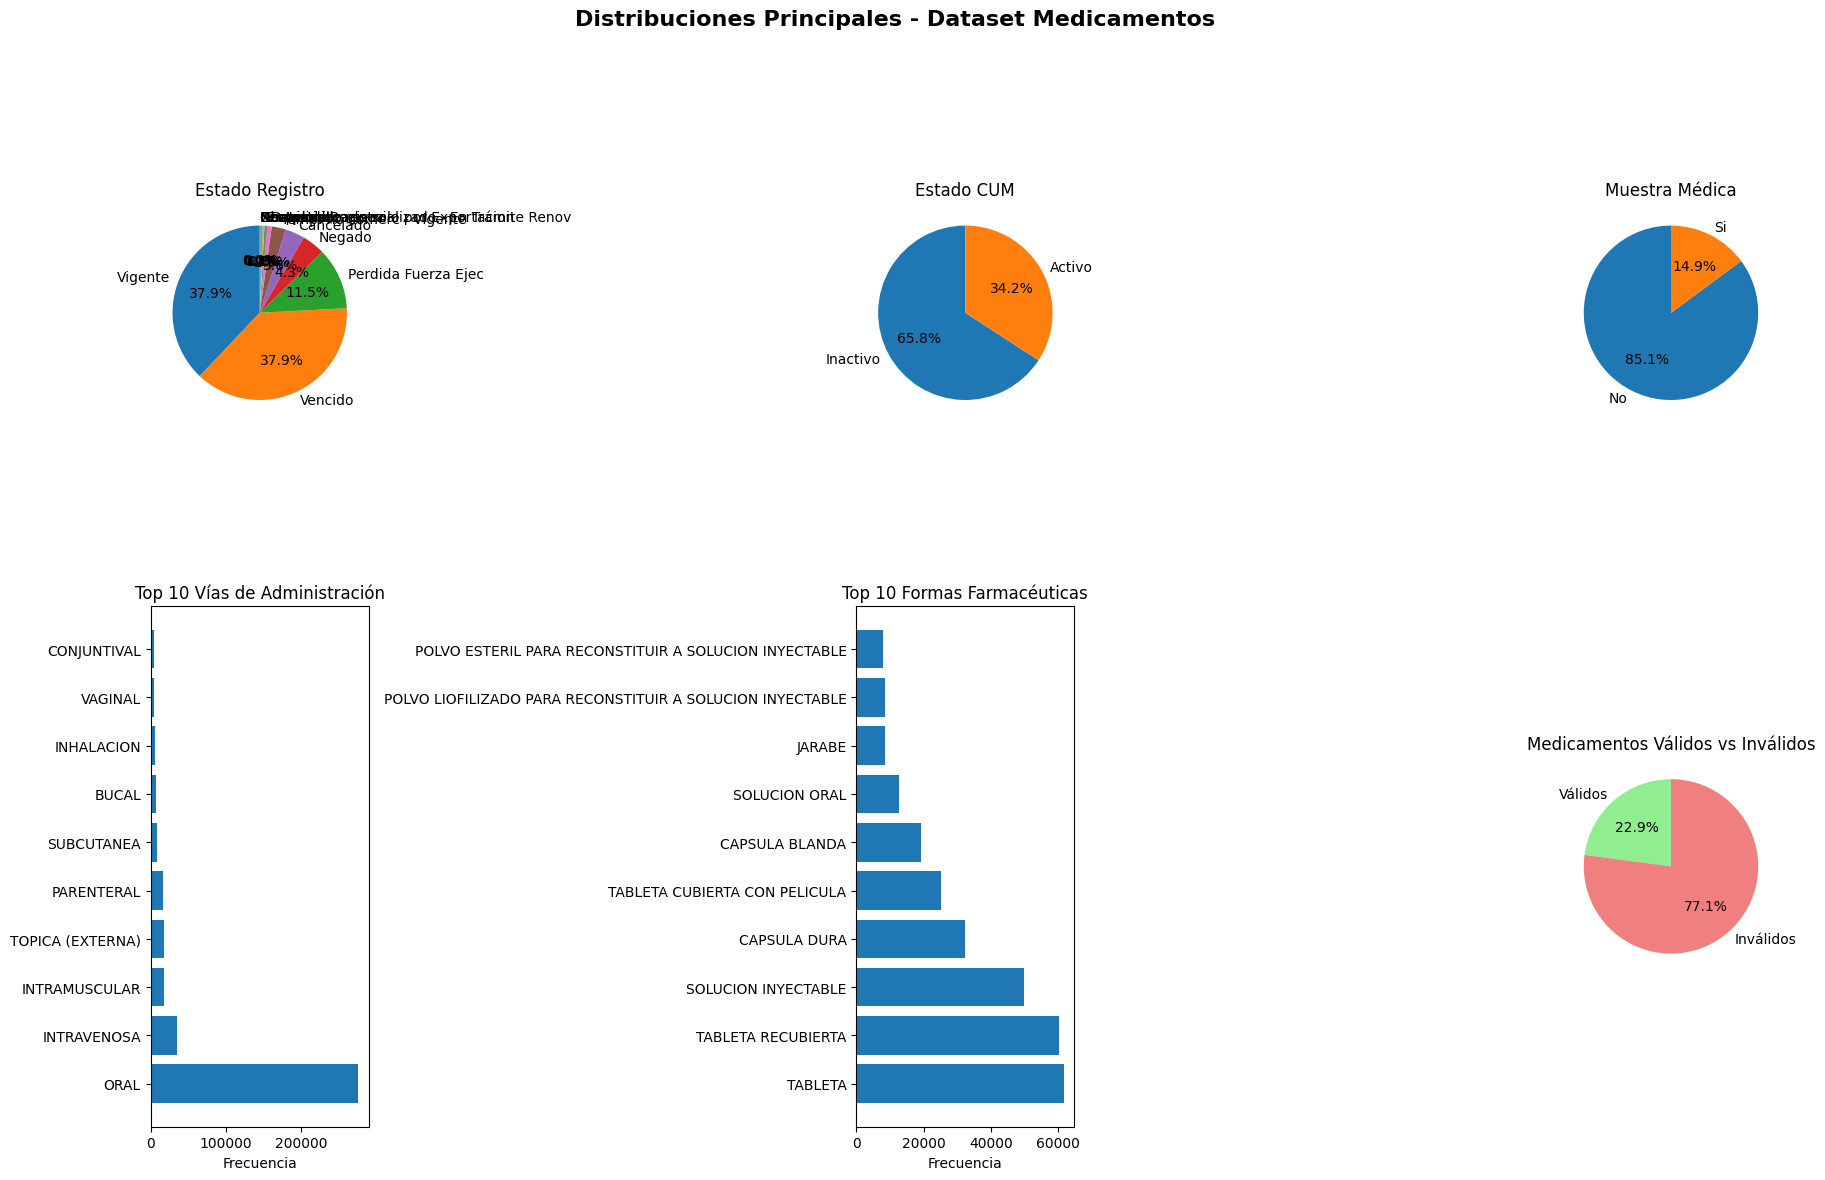

In [59]:
import matplotlib.pyplot as plt

print("="*60)
print("GENERANDO VISUALIZACIONES")
print("="*60)

# Configurar subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones Principales - Dataset Medicamentos', fontsize=16, fontweight='bold')

# 1. Estado Registro
estado_reg = df_preproc['ESTADO REGISTRO'].value_counts().sort("count", descending=True)
labels = estado_reg.select(pl.col('ESTADO REGISTRO')).to_series().to_list()
values = estado_reg.select(pl.col('count')).to_series().to_list()
axes[0,0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Estado Registro')

# 2. Estado CUM
estado_cum = df_preproc['ESTADO CUM'].value_counts().sort("count", descending=True)
labels = estado_cum.select(pl.col('ESTADO CUM')).to_series().to_list()
values = estado_cum.select(pl.col('count')).to_series().to_list()
axes[0,1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Estado CUM')

# 3. Muestra Médica
muestra = df_preproc['MUESTRA MÉDICA'].value_counts().sort("count", descending=True)
labels = muestra.select(pl.col('MUESTRA MÉDICA')).to_series().to_list()
values = muestra.select(pl.col('count')).to_series().to_list()
axes[0,2].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0,2].set_title('Muestra Médica')

# 4. Top 10 Vías de Administración
vias = df_preproc['VÍA ADMINISTRACIÓN'].value_counts().sort("count", descending=True).head(10)
labels = vias.select(pl.col('VÍA ADMINISTRACIÓN')).to_series().to_list()
values = vias.select(pl.col('count')).to_series().to_list()
axes[1,0].barh(range(len(values)), values)
axes[1,0].set_yticks(range(len(values)))
axes[1,0].set_yticklabels(labels)
axes[1,0].set_title('Top 10 Vías de Administración')
axes[1,0].set_xlabel('Frecuencia')

# 5. Top 10 Formas Farmacéuticas
formas = df_preproc['FORMA FARMACÉUTICA'].value_counts().sort("count", descending=True).head(10)
labels = formas.select(pl.col('FORMA FARMACÉUTICA')).to_series().to_list()
values = formas.select(pl.col('count')).to_series().to_list()
axes[1,1].barh(range(len(values)), values)
axes[1,1].set_yticks(range(len(values)))
axes[1,1].set_yticklabels(labels)
axes[1,1].set_title('Top 10 Formas Farmacéuticas')
axes[1,1].set_xlabel('Frecuencia')

# 6. Válidos vs Inválidos
mascara_validos = (
    (df_preproc['ESTADO REGISTRO'] == 'Vigente') & 
    (df_preproc['ESTADO CUM'] == 'Activo') & 
    (df_preproc['MUESTRA MÉDICA'] == 'No')
)
validos_invalidos = ['Válidos', 'Inválidos']
conteos = [mascara_validos.sum(), (~mascara_validos).sum()]

axes[1,2].pie(conteos, labels=validos_invalidos, autopct='%1.1f%%', 
                colors=['lightgreen', 'lightcoral'], startangle=90)
axes[1,2].set_title('Medicamentos Válidos vs Inválidos')

plt.tight_layout()
plt.show()

In [61]:
# Del output de esta celda:
print(f"   ✅ Medicamentos VÁLIDOS (candidatos): {len(validos):,} ({len(validos)/len(df_preproc)*100:.1f}%)")
print(f"   ❌ Medicamentos INVÁLIDOS (a homologar): {len(invalidos):,} ({len(invalidos)/len(df_preproc)*100:.1f}%)")

   ✅ Medicamentos VÁLIDOS (candidatos): 93,140 (22.9%)
   ❌ Medicamentos INVÁLIDOS (a homologar): 313,667 (77.1%)


In [62]:
print(f"   📋 Estado Registro ≠ 'Vigente': {no_vigente.sum():,}")
print(f"   📋 Estado CUM ≠ 'Activo': {no_activo.sum():,}")
print(f"   📋 Es Muestra Médica: {es_muestra.sum():,}")

   📋 Estado Registro ≠ 'Vigente': 252,487
   📋 Estado CUM ≠ 'Activo': 267,810
   📋 Es Muestra Médica: 60,621


In [63]:
print(f"🧬 Total de principios activos únicos: {len(principios):,}")
print(f"📊 Principios con un solo medicamento: {(principios['count'] == 1).sum():,}")
print(f"📊 Principios con múltiples medicamentos: {(principios['count'] > 1).sum():,}")

🧬 Total de principios activos únicos: 20,321
📊 Principios con un solo medicamento: 1,806
📊 Principios con múltiples medicamentos: 18,515


In [64]:
df_preproc.write_parquet("./data/medicamentos_preprocesados.parquet")
print("✅ Dataset preprocesado guardado como 'medicamentos_preprocesados.parquet' en el directorio './data/'")

✅ Dataset preprocesado guardado como 'medicamentos_preprocesados.parquet' en el directorio './data/'
